Paquetes necesarios

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [21]:
#Dimensiones de la imagen a crear
alto, ancho = 800, 800

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

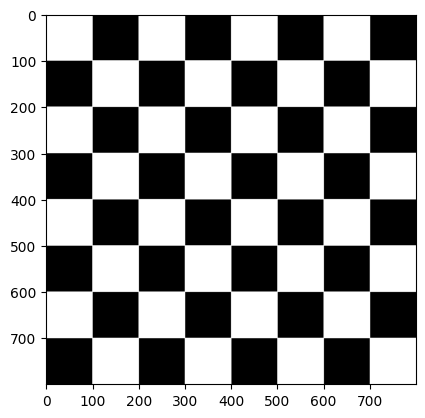

True

In [23]:
color_img = np.zeros((alto, ancho, 3), dtype = np.uint8) # Imagen en color negro
step = int(alto / 8)

for i in range(0, alto, step):
    for j in range(0, ancho, step):
        # Dibuja casillas blancas, donde la suma de los indices resulte un número par
        if (i + j) % (2*step) == 0:
            cv2.rectangle(color_img, (j, i), (j + step, i + step), (255, 255, 255), -1)

#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()

#Salva la imagen resultante a disco
cv2.imwrite('ajedrez.jpg', color_img)

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

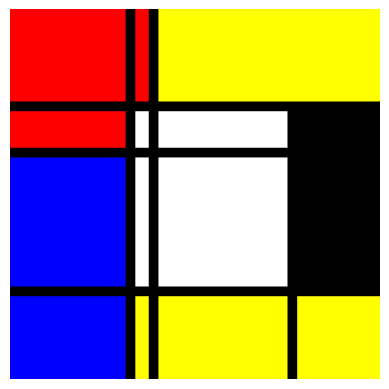

True

In [ ]:
mondrian_img = np.zeros((alto, ancho, 3), dtype=np.uint8) # Imagen en color negro

# Dibujar rectángulos de colores
cv2.rectangle(mondrian_img, (0, 0), (300, 300), (0, 0, 255), -1)     # Rojo
cv2.rectangle(mondrian_img, (320, 0), (800, 200), (0, 255, 255), -1) # Amarillo
cv2.rectangle(mondrian_img, (0, 320), (250, 800), (255, 0, 0), -1)   # Azul
cv2.rectangle(mondrian_img, (270, 220), (600, 600), (255, 255, 255), -1) # Blanco
cv2.rectangle(mondrian_img, (620, 220), (800, 600), (0, 0, 0), -1)   # Negro
cv2.rectangle(mondrian_img, (270, 620), (800, 800), (0, 255, 255), -1) # Amarillo

# Añadir líneas negras gruesas encima
cv2.line(mondrian_img, (310, 0), (310, 800), (0, 0, 0), 20)   # vertical
cv2.line(mondrian_img, (260, 0), (260, 800), (0, 0, 0), 20)   # vertical
cv2.line(mondrian_img, (0, 310), (800, 310), (0, 0, 0), 20)   # horizontal
cv2.line(mondrian_img, (0, 610), (800, 610), (0, 0, 0), 20)   # horizontal
cv2.line(mondrian_img, (610, 210), (610, 800), (0, 0, 0), 20) # vertical
cv2.line(mondrian_img, (0, 210), (800, 210), (0, 0, 0), 20)   # horizontal

# Mostrar la imagen
plt.imshow(cv2.cvtColor(mondrian_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Guardar la imagen resultante
cv2.imwrite("mondrian.jpg", mondrian_img)


TAREA: Modifica de forma libre los valores de un plano de la imagen

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Copiamos el frame original
        frame_mod = frame.copy()
        
        # Invertimos el plano azul
        frame_mod[:,:,0] = 255 - frame_mod[:,:,0]
        
        # Mostramos la imagen
        cv2.imshow('RGB con azul invertido', frame_mod)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

In [ ]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if ret:
        # Escala de grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Posiciones de mínimo y máximo
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray)
        
        # Dibujar círculo en el píxel más oscuro (minLoc) y más claro (maxLoc)
        cv2.circle(frame, minLoc, 8, (255, 255, 255), 2)
        cv2.circle(frame, maxLoc, 8, (0, 0, 0), 2)
        
        cv2.imshow("Vid", frame)
    
    if cv2.waitKey(20) == 27:  # ESC para salir
        break

vid.release()
cv2.destroyAllWindows()

¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [ ]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if ret:
        # Escala de grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        h, w = gray.shape
        
        block_size = 8
        min_mean, max_mean = 255, 0
        min_pos, max_pos = (0,0), (0,0)
        
        # Recorremos la imagen en bloques de 8x8
        for y in range(0, h-block_size, block_size):
            for x in range(0, w-block_size, block_size):
                block = gray[y:y+block_size, x:x+block_size]
                mean_val = np.mean(block) # Calculamos el valor medio del bloque
                
                if mean_val < min_mean: # Si el valor medio es menor que el mínimo registrado, lo actualizamos 
                    min_mean = mean_val
                    min_pos = (x, y)
                if mean_val > max_mean: # Si el valor medio es mayor que el máximo registrado, lo actualizamos 
                    max_mean = mean_val
                    max_pos = (x, y)
        
       # Calculamos el centro de cada bloque
        min_center = (min_pos[0] + block_size//2, min_pos[1] + block_size//2)
        max_center = (max_pos[0] + block_size//2, max_pos[1] + block_size//2)

        cv2.circle(frame, min_center, block_size//2, (255, 255, 255), 2)       # círculo blanco = bloque más oscuro
        cv2.circle(frame, max_center, block_size//2, (0, 0, 0), 2) # círculo negro = bloque más claro
        
        cv2.imshow("Vid", frame)
    
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()


TAREA: Llevar a cabo una propuesta propia de pop art

In [42]:
# Filtro líneas
vid = cv2.VideoCapture(0)

# Número de celdas
ncells = 10
off = int(ncells/2)

while True:      
    ret, frame = vid.read()
    if ret:
        h, w, c = frame.shape
        # Redimensionamos
        down_frame = cv2.resize(frame, (int(w/ncells), int(h/ncells)), cv2.INTER_NEAREST)
        h2, w2, c2 = down_frame.shape

        # Separamos canales
        r = down_frame[:,:,0]
        g = down_frame[:,:,1]
        b = down_frame[:,:,2]

        # Creamos imagen negra
        gris_up_frame = np.zeros((h2*ncells, w2*ncells, 1), dtype=np.uint8)

        # Recorrer valores de la imagen reducida
        for y in range(h2):
            for x in range(w2):
                # Intensidad promedio RGB
                intensity = (int(r[y,x]) + int(g[y,x]) + int(b[y,x])) / 3
                # Altura de la línea según intensidad
                line_height = int((intensity / 255) * ncells)
                # Dibujamos rectángulo horizontal centrado
                y_start = y * ncells + (ncells - line_height)//2
                y_end = y_start + line_height
                cv2.rectangle(gris_up_frame, (x*ncells, y_start), ((x+1)*ncells, y_end), (255,255,255), -1)

        cv2.imshow("Vid", gris_up_frame)

    # ESC para salir
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()


In [ ]:
vid = cv2.VideoCapture(0)

# Se define el número de celdas
ncells = 10
off = int(ncells/2)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Dimensiones originales
        h, w, c = frame.shape
        #Redimensiono teniendo en cuenta ncells
        down_frame = cv2.resize(frame, (int(w/ncells),int(h/ncells)),cv2.INTER_NEAREST)
        #Dimensiones reducidas
        h2, w2, c2 = down_frame.shape

        #Separamos canales
        r = down_frame[:,:,0]
        g = down_frame[:,:,1]
        b = down_frame[:,:,2]

        # Creamos imagen negra
        gris_up_frame = np.zeros((h2*ncells,w2*ncells,1), dtype = np.uint8)

        # recorre valores de la imagen reducida
        for y in range(0,h2):
            for x in range(0,w2):
                # La suma de los valores RGB define el radio del círculo
                rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))
                cv2.circle(gris_up_frame,(x*ncells+off, y*ncells + off), rad, (255,255,255), -1)

    
        # Muestra fotograma resultante
        cv2.imshow('Cam', gris_up_frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

C:\Users\lucia\AppData\Local\Temp\ipykernel_18776\3568655053.py:31: RuntimeWarning: overflow encountered in scalar add
  rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))
